# Regression in Python via StatsModel

In [2]:
# Import Statements
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# Example 1 - Taiwanese Real Estate Market
taiwan_real_estate = pd.read_csv("data_sets/taiwan_real_estate2.csv")

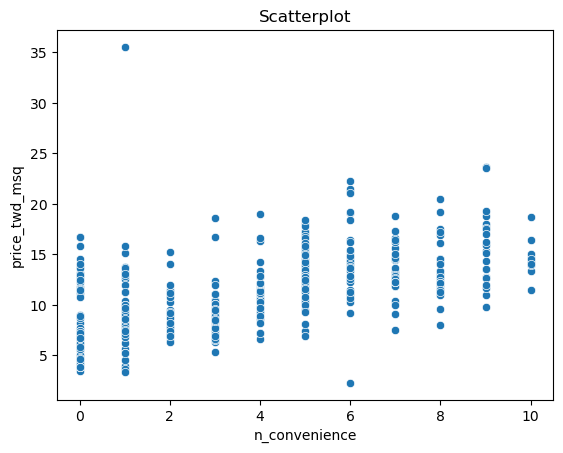

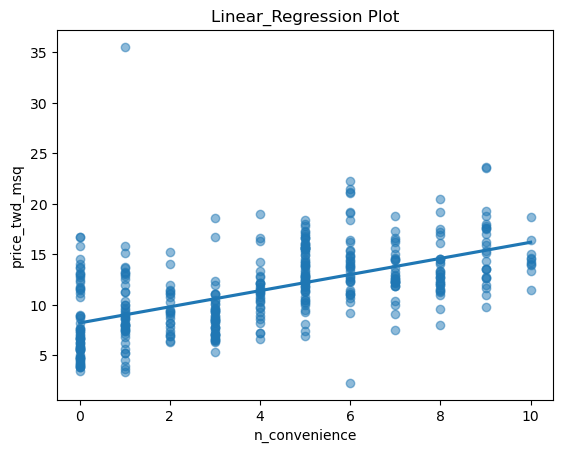

In [4]:
# Make graphs:

# Draw the scatter plot
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=taiwan_real_estate).set_title("Scatterplot")
plt.show()

# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(x="n_convenience",
         y="price_twd_msq",
         data=taiwan_real_estate,
         ci=None,
         scatter_kws={'alpha': 0.5}).set_title("Linear_Regression Plot")

# Show the plot
plt.show()

In [5]:
# Fit the data
from statsmodels.formula.api import ols

# This code won't work since we actually don't have the data:
# mdl_payments_vs_claims = ols("total_payments_sek ~n_clains", data = swedish_motor_insurance)

# # fit the dta
# mdl_payment_vs_claims = mdl_payments_vs_claims.fit()

# print(mdl_payment_vs_claims)

/Users/christine/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/christine/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/christine/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/christine/anaconda3/lib/python3.11/site-packages/seaborn/_oldc

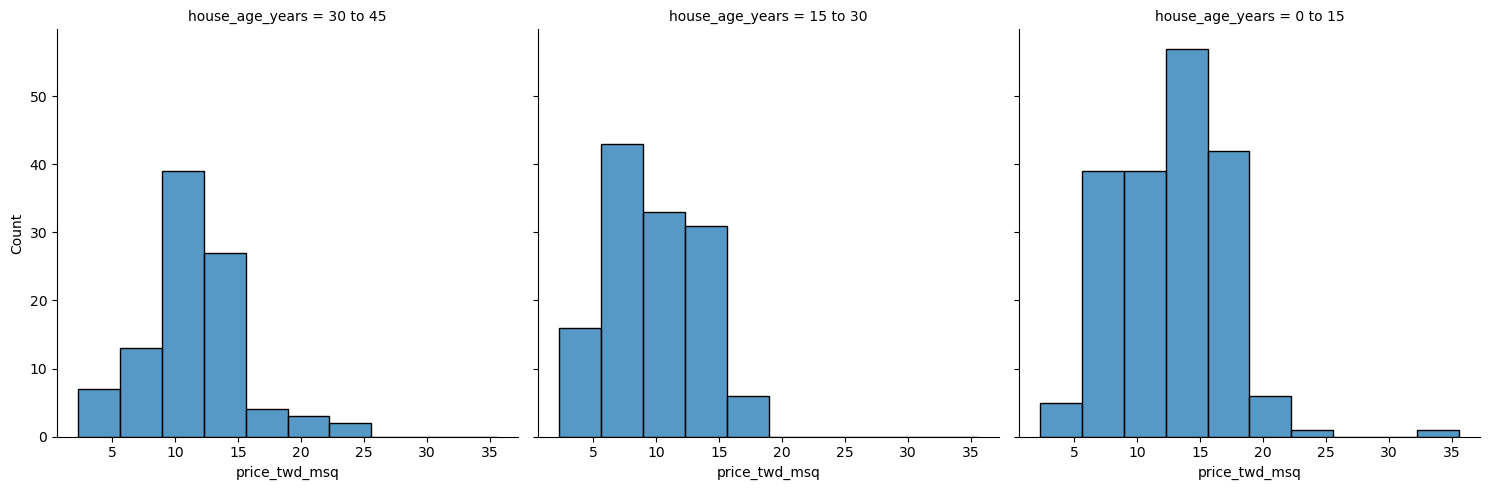

In [6]:
# Taiwanese House price (x) vs. number of years (y)

# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data=taiwan_real_estate,
         x="price_twd_msq",
         col="house_age_years",
         bins=10,
         col_wrap = 3)

# Show the plot
plt.show()

In [13]:
# calculate means

# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = taiwan_real_estate.groupby("house_age_years")[["n_convenience", "price_twd_msq"]].count()

# Print the result
print(mean_price_by_age)

                 n_convenience  price_twd_msq
house_age_years                              
0 to 15                    190            190
15 to 30                   129            129
30 to 45                    95             95


In [14]:
# Fit the model - standard OLS with 1 x, 1 y = where the structure is y~x

# Create the model, fit it
mdl_price_vs_age = ols("price_twd_msq ~ house_age_years", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


In [15]:
# Fix the model so the intercept is zero, and the values of the other categorical variables are the means as coefficients:

# Update the model formula to remove the intercept
mdl_price_vs_age0 = ols("price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


# Make Predictions on Data

In [16]:
# Import numpy with alias np
import numpy as np

# Create the explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})

# Print it
print(explanatory_data)

    n_convenience
0               0
1               1
2               2
3               3
4               4
5               5
6               6
7               7
8               8
9               9
10             10


In [18]:
# Import numpy and alias it np
# import numpy as np

# # Create explanatory_data 
# explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})


# # Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
# price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

# # mdl_price_vs_conv is the linear regression model fitted before

# # Print it
# print(price_twd_msq)

In [26]:
# Example of creating a model and passing it thru:

# Import numpy with alias np
import numpy as np

# Create explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})
print(explanatory_data)

# Train the model:
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data = taiwan_real_estate).fit()

# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
# This step passes the exploratory data into the prediction model, mdl_price_vs_conv

# Create the y-value column!
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

# Create prediction_data
# This generates the y-values prediction
prediction_data = explanatory_data.assign(price_twd_msq = price_twd_msq)

# Print the result
print(prediction_data)

# Make sure to be careful of extrapolation

    n_convenience
0               0
1               1
2               2
3               3
4               4
5               5
6               6
7               7
8               8
9               9
10             10
    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


In [21]:
mdl_price_vs_conv.params

Intercept        8.224237
n_convenience    0.798080
dtype: float64

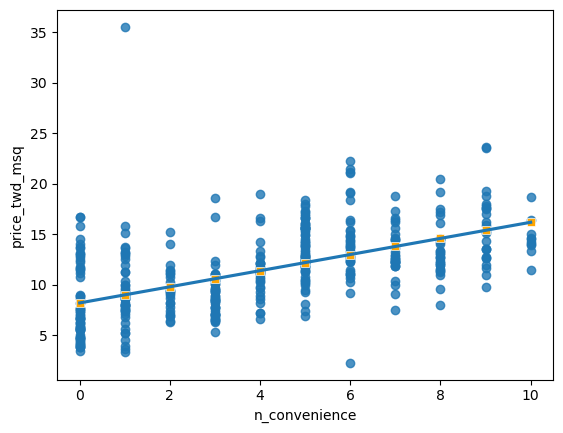

In [25]:
# Demonstrating the results
# Create a new figure, fig
fig = plt.figure()

sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci= None)
# Add a scatter plot layer to the regplot
sns.scatterplot(x="n_convenience",
            y="price_twd_msq",
            data= prediction_data,
            color = "orange",
            marker = "s")

# Show the layered plot
plt.show()

In [27]:
# Simplifications instead of trying everything

# If you want to pass the range of X-Values of the original dataset, use the following:

# Print the model parameters of mdl_price_vs_conv
print(mdl_price_vs_conv.params)

# Print the fitted values of mdl_price_vs_conv - you don't need to declare
print(mdl_price_vs_conv.fittedvalues)

# Print the residuals of mdl_price_vs_conv
print(mdl_price_vs_conv.resid)

# Print a summary of mdl_price_vs_conv
print(mdl_price_vs_conv.summary())

Intercept        8.224237
n_convenience    0.798080
dtype: float64
0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64
0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64
                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Fri, 31 May 2024   Prob (F-statistic):           3.41e-37
Time:                        17:53:26   Log-Likelihood:                -1091.1
No. Observations:                 414   

In [28]:
# Get the coefficients of mdl_price_vs_conv
coeffs = mdl_price_vs_conv.params

# Get the intercept
intercept = coeffs[0]

# Get the slope
slope = coeffs[1]
 
# Manually calculate the predictions - this is simply using the formula
price_twd_msq = intercept + slope * explanatory_data
print(price_twd_msq)

# Compare to the results from .predict()
print(price_twd_msq.assign(predictions_auto=mdl_price_vs_conv.predict(explanatory_data)))

    n_convenience
0        8.224237
1        9.022317
2        9.820397
3       10.618477
4       11.416556
5       12.214636
6       13.012716
7       13.810795
8       14.608875
9       15.406955
10      16.205035
    n_convenience  predictions_auto
0        8.224237          8.224237
1        9.022317          9.022317
2        9.820397          9.820397
3       10.618477         10.618477
4       11.416556         11.416556
5       12.214636         12.214636
6       13.012716         13.012716
7       13.810795         13.810795
8       14.608875         14.608875
9       15.406955         15.406955
10      16.205035         16.205035


/var/folders/vv/54f2s9796xj4fpznwy0p3f_c0000gn/T/ipykernel_50415/2971113896.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = coeffs[0]
/var/folders/vv/54f2s9796xj4fpznwy0p3f_c0000gn/T/ipykernel_50415/2971113896.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = coeffs[1]


In [29]:
# Example code:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Run a linear regression of price_twd_msq vs. sqrt_dist_to_mrt_m
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Create exploratory data
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# Create prediction_data by adding a column of predictions to explantory_data
# This step skips over the prediction part as its own step
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

# Print the result
print(prediction_data)

   sqrt_dist_to_mrt_m  dist_to_mrt_m  price_twd_msq
0                 0.0              0      16.709799
1                10.0            100      14.881370
2                20.0            400      13.052942
3                30.0            900      11.224513
4                40.0           1600       9.396085
5                50.0           2500       7.567656
6                60.0           3600       5.739227
7                70.0           4900       3.910799
8                80.0           6400       2.082370


In [ ]:
# # Plotting, back_transformation and plotting comparison vs. scatterplots

# # Back transform qdrt_n_clicks
# prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4

# # Plot the transformed variables
# fig = plt.figure()
# sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)

# # Add a layer of your prediction points
# sns.scatterplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=prediction_data, color = "red")

# plt.show()